In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from typing import List, Tuple
from tqdm import tqdm # For Progress Bar

## DATA LOADING

Loading the data using Pandas and converting into dataframe. Also convert it into Pandas Dataseries Object.

In [ ]:
# Define file paths, test and train files
train_file = 'train_path'
test_file = 'test_path'

In [3]:
# Convert the data into a tuple
def data_loader(file:pathlib.PosixPath, target:str=None, verbose:bool = False, **kwargs) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Loads csv file and return a tuple with a pandas dataset 
    containing all features, and a pandas Series with the 
    target variable.
    """
    
    data = pd.read_csv(file, **kwargs)
    df = data # see reduce.py in Utility Script 
    
    if target is not None:
        out = (df[target]).astype(int)
        df.drop([target], axis=1, inplace=True)
    else:
        out = None
        
    
    if verbose:
        print('The dataset contains {0} entries and {1} features'.format(*df.shape))
    
    return df, out  #df is features, out is target variable

In [4]:
train_data, train_target = data_loader(file = train_file, target = 'Class/ASD', verbose=True, index_col='ID')
test_data, _ = data_loader(file = test_file, target=None, verbose=True, index_col='ID') # No Target for test data

The dataset contains 800 entries and 20 features
The dataset contains 200 entries and 20 features


In [5]:
print("Original train_data has NaNs:", train_data.isnull().sum().sum())


Original train_data has NaNs: 0


In [6]:
train_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
ID,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self
2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?
3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self
4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?
5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self


In [7]:
test_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
ID,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
2,1,0,0,0,1,0,0,0,0,0,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
3,1,0,0,1,0,1,0,1,0,0,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
4,1,1,1,0,1,0,1,0,1,1,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
5,1,0,0,1,1,0,0,1,1,0,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


## Preprocessing

Let's first try EDA

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result           800 

In [9]:
train_data.isnull().values.any(), test_data.isnull().values.any() #No missing data

(False, False)

In [10]:
train_target.value_counts() #Imbalanced Data 

Class/ASD
0    615
1    185
Name: count, dtype: int64

In [11]:
autistic = train_target.value_counts()

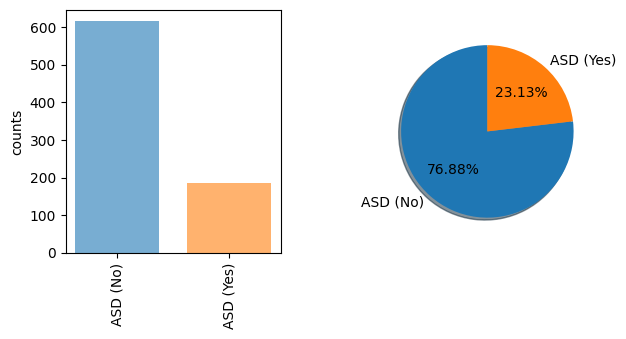

In [12]:
#Visualization of target variable

autistic = train_target.value_counts() 

fig, ax = plt.subplots(1,2, figsize =(6,3))
fig.tight_layout(pad = 1, h_pad = 2, w_pad = 4)

mylabels = ['ASD (No)', 'ASD (Yes)']
mycolors = ['tab:blue', 'tab:orange']

ax[0].bar(x=mylabels, height = autistic, color = mycolors, width = 0.75, alpha = .6)

for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
ax[0].set_ylabel('counts')#, ax[0].set_yticks(np.arange(0,4000,500))

ax[1].pie(autistic.values, labels = mylabels, colors = mycolors, autopct='%2.2f%%',shadow=True, startangle=90);

In [13]:
train_data.describe()
#A*_Score are evaluation tests, we need to normalize Age and Result

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530
std,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556
50%,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472
75%,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868


In [14]:
test_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.585000,0.285000,0.355000,0.450000,0.475000,0.21000,0.285000,0.725000,0.330000,0.390000,27.875051,6.912688
std,0.493958,0.452547,0.479714,0.498742,0.500628,0.40833,0.452547,0.447635,0.471393,0.488974,12.489213,3.949887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,7.822865,-1.721289
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.889947,4.303175
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,24.754095,7.138223
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,31.165789,9.756596
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,66.163937,13.369400


In [15]:
"""
Why??
--Helps in EDA to understand feature types

--Guides encoding strategies:
    Binary → Label Encoding
    Multiclass → OneHot or Ordinal

--Identifies low-variance/uninformative features
"""

for col in train_data.select_dtypes(['category']).columns :
    myval = train_data[col].unique().tolist()
    if len(myval) == 2:
        print(f'BIVARIATE   : {col} -> {train_data[col].unique().tolist()}')
    elif len(myval) == 1:
        print(f'UNIVARIATE   : {col} -> {train_data[col].unique().tolist()}')
    else:
        print(f'MULTIVARIATE: {col} -> {train_data[col].unique().tolist()}')

In [16]:
for col in test_data.select_dtypes(['category']).columns :
    myval = test_data[col].unique().tolist()
    if len(myval) == 2:
        print(f'BIVARIATE   : {col} -> {test_data[col].unique().tolist()}')
    elif len(myval) == 1:
        print(f'UNIVARIATE   : {col} -> {test_data[col].unique().tolist()}')
    else:
        print(f'MULTIVARIATE: {col} -> {test_data[col].unique().tolist()}')


In [17]:
train_data['age_desc'].unique(), test_data['age_desc'].unique() # This variable is not informative, we will remove it.

(array(['18 and more'], dtype=object), array(['18 and more'], dtype=object))

Checked the datasets to check any discripancy between train and test. Found None.

In [18]:
for i,j in enumerate(np.sort(train_data.ethnicity.unique())):
    print(f'{i:2d} --   {j:15s}')

 0 --   ?              
 1 --   Asian          
 2 --   Black          
 3 --   Hispanic       
 4 --   Latino         
 5 --   Middle Eastern 
 6 --   Others         
 7 --   Pasifika       
 8 --   South Asian    
 9 --   Turkish        
10 --   White-European 
11 --   others         


In [19]:
for i,j in enumerate(np.sort(test_data.ethnicity.unique())):
    print(f'{i:2d} --   {j:15s}')

 0 --   ?              
 1 --   Asian          
 2 --   Black          
 3 --   Hispanic       
 4 --   Latino         
 5 --   Middle Eastern 
 6 --   Others         
 7 --   Pasifika       
 8 --   South Asian    
 9 --   Turkish        
10 --   White-European 
11 --   others         


In [20]:
train_data['ethnicity'].value_counts()

ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64

In [21]:
# ? is others in ethnicity and relation for training set

# for train set:
train_data.ethnicity[train_data['ethnicity'] =='others'] = '?'
train_data['ethnicity'].value_counts()
    
# for test set:
test_data.ethnicity[test_data['ethnicity'] =='?'] = 'others'
test_data['ethnicity'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2240930554.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data.ethnicity[train_data['ethnicity'] =='others'] = '?'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2240930554.py:4: 

ethnicity
White-European     48
others             38
Middle Eastern     34
Asian              31
Black              10
South Asian         9
Latino              7
Pasifika            7
Turkish             7
Others              5
Hispanic            4
Name: count, dtype: int64

In [22]:
# If different ethnicit this will affect one-hot-encoding
len(test_data.ethnicity.unique()), len(train_data.ethnicity.unique())

(11, 11)

In [23]:
# for train set:
train_data.relation[train_data['relation'] =='Others'] = '?'
train_data['relation'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2532421675.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data.relation[train_data['relation'] =='Others'] = '?'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2532421675.py:2: Se

relation
Self                        617
?                            84
Parent                       49
Relative                     43
Health care professional      7
Name: count, dtype: int64

In [24]:
#for test set:
test_data.relation[test_data['relation'] =='Others'] = '?'
test_data['relation'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\3082756719.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_data.relation[test_data['relation'] =='Others'] = '?'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\3082756719.py:2: Sett

relation
Self                        166
?                            15
Relative                     10
Parent                        8
Health care professional      1
Name: count, dtype: int64

In [25]:
# If different ethnicit this will affect one-hot-encoding
len(test_data.relation.unique()), len(train_data.relation.unique())

(5, 5)

In [26]:
# There are some different countries in the two datasets, this will affect one-hot-encoding
len(train_data['contry_of_res'].unique()), len(test_data['contry_of_res'].unique())

(61, 44)

In [27]:
# There are some different countries in the two datasets, this will affect one-hot-encoding
np.array_equiv(train_data['contry_of_res'].unique(), test_data['contry_of_res'].unique())

False

There are different countries in the two datasets, this will affect one-hot-encoding thus we will bifurcate them in continents using the continents dataset.

In [28]:
# Mapping the countries to continents
# We will use the continents dataset to map the countries to continents                         

# Load the dataset of country/region
data = pd.read_csv(r'C:\Users\ASUS\Desktop\Research\kaggle_codes\continents2.csv')

continent = pd.Series(data.region.values, index = data.name).to_dict() # create a dictionary
continent['Antarctica'] = 'Antarctica'

print(data.region.unique())

['Asia' 'Europe' 'Africa' 'Oceania' 'Americas' nan]


In [29]:
# AmericanSamoa should be American Samoa
train_data[train_data['contry_of_res'] == 'AmericanSamoa'].index

Index([318, 616], dtype='int64', name='ID')

In [30]:
# Viet Nam should be Vietnam
train_data[train_data['contry_of_res'] == 'Viet Nam'].index

Index([77, 130, 170, 488, 711, 795], dtype='int64', name='ID')

We will rank the countries that appear the most number of times in the dataset to get better understanding

In [31]:
true_idx = train_target[(train_target==1)].index 
false_idx = train_target[(train_target==0)].index
np.sum([(train_target==0) & (train_data['contry_of_res']=='United States')])

74

In [32]:
# Create country weight dictionary 

ncountry = train_data['contry_of_res'].nunique()
print(f'Number of unique countries = {ncountry}')

# 1. Count and rank countries
ranking = range(1,ncountry+1)[::-1]
country = train_data['contry_of_res'].value_counts().index.to_list()
rank_country = dict( zip(country, ranking))
print(f'Length ranking dictionary  = {len(rank_country)}')

Number of unique countries = 61
Length ranking dictionary  = 61


In [33]:
# 2. apply a pos/neg ratio to the rank

for key, val in rank_country.items():
    pos = np.sum( [(train_target==1) & (train_data['contry_of_res']==key)] ) # when Class/ASD is yes and country is key
    neg = np.sum( [(train_target==0) & (train_data['contry_of_res']==key)] ) # when Class/ASD is no  and country is key
    assert pos+neg == (train_data['contry_of_res']==key).sum()
    if neg ==0:
        ratio = 0 # avoid zero-division error
    else:
        ratio = pos/neg
    rank_country[key] = ratio*val # n_total

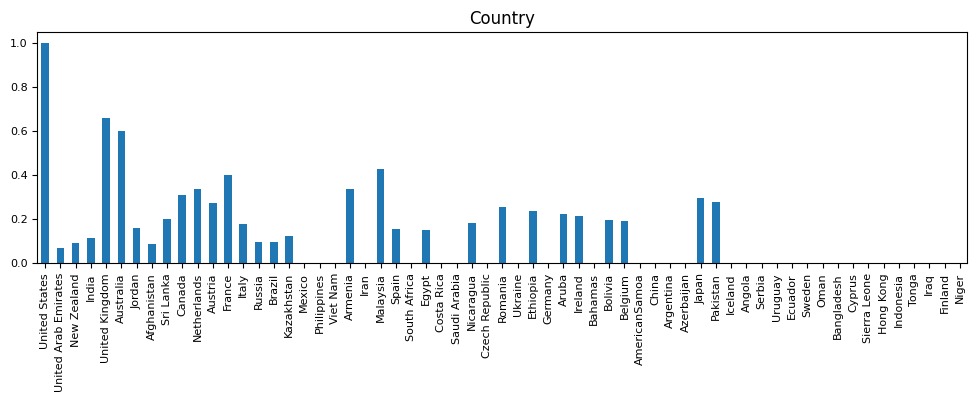

In [34]:
# 3. (0-1) normalize those ratios
mymax = np.max(list(rank_country.values()))
mymin = np.min(list(rank_country.values()))
normalize = lambda x: (x-mymin)/(mymax-mymin)
weight_country = {key:normalize(val) for key,val in rank_country.items()}
pd.Series(weight_country).plot.bar(figsize=(12,3), fontsize=8, title='Country');

In [35]:
weight_country['Viet Nam'], weight_country['AmericanSamoa']

(0.0, 0.0)

In [36]:
# Correcting two typos in dictionary
weight_country['Vietnam'] = weight_country.pop('Viet Nam')
weight_country['American Samoa'] = weight_country.pop('AmericanSamoa')

We Use similar approach for relation and ethnicity

Number of unique ethnicities = 11
Length ranking dictionary  = 11


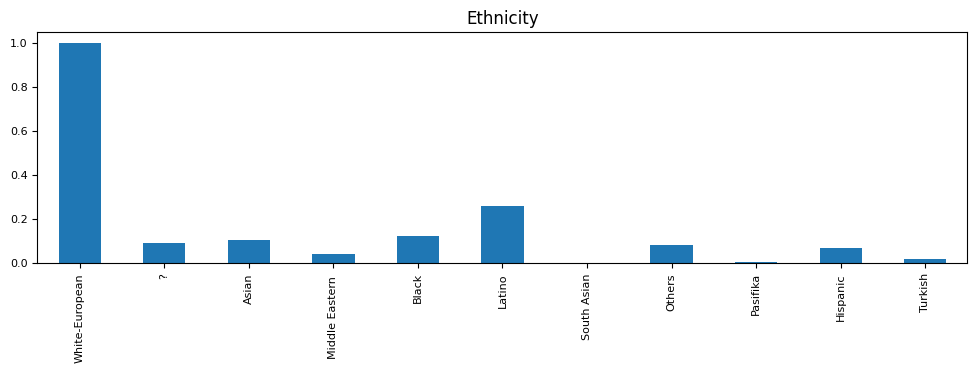

In [37]:
# Create ethnicity weight dictionary 
nethnicity = train_data['ethnicity'].nunique()
print(f'Number of unique ethnicities = {nethnicity}')

# 1. Count and rank ethnicities

ranking = range(1,nethnicity+1)[::-1]
ethnicity = train_data['ethnicity'].value_counts().index.to_list()
rank_ethnicity = dict( zip(ethnicity, ranking))
print(f'Length ranking dictionary  = {len(rank_ethnicity)}')

# 2. apply a pos/neg ratio to the rank
for key, val in rank_ethnicity.items():
    pos = np.sum( [(train_target==1) & (train_data['ethnicity']==key)] ) # when Class/ASD is yes and country is key
    neg = np.sum( [(train_target==0) & (train_data['ethnicity']==key)] ) # when Class/ASD is no  and country is key
    assert pos+neg == (train_data['ethnicity']==key).sum()
    if neg ==0:
        ratio = 0 # avoid zero-division error
    else:
        ratio = pos/neg
    rank_ethnicity[key] = ratio*val # n_total

# 3. (0-1) normalize those ratios
mymax = np.max(list(rank_ethnicity.values()))
mymin = np.min(list(rank_ethnicity.values()))
normalize = lambda x: (x-mymin)/(mymax-mymin)
weight_ethnicity = {key:normalize(val) for key,val in rank_ethnicity.items()}
pd.Series(weight_ethnicity).plot.bar(figsize=(12,3), fontsize=8, title='Ethnicity');

Number of unique relation = 5
Length ranking dictionary  = 5


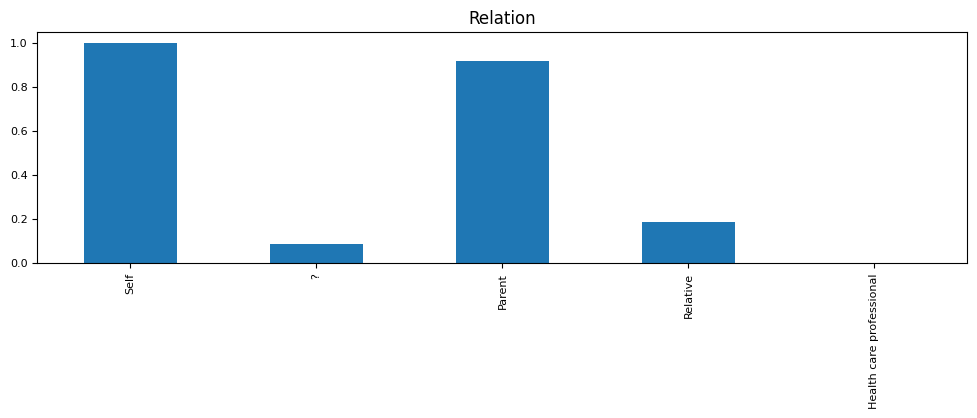

In [38]:
# Create ethnicity weight dictionary 
nrelation = train_data['relation'].nunique()
print(f'Number of unique relation = {nrelation}')


# 1. Count and rank ethnicities

ranking = range(1,nrelation+1)[::-1]
relation = train_data['relation'].value_counts().index.to_list()
rank_relation = dict( zip(relation, ranking))
print(f'Length ranking dictionary  = {len(rank_relation)}')


# 2. apply a pos/neg ratio to the rank
for key, val in rank_relation.items():
    pos = np.sum( [(train_target==1) & (train_data['relation']==key)] ) # when Class/ASD is yes and country is key
    neg = np.sum( [(train_target==0) & (train_data['relation']==key)] ) # when Class/ASD is no  and country is key
    assert pos+neg == (train_data['relation']==key).sum()
    if neg ==0:
        ratio = 0 # avoid zero-division error
    else:
        ratio = pos/neg
    rank_relation[key] = ratio*val # n_total

# 3. (0-1) normalize those ratios
mymax = np.max(list(rank_relation.values()))
mymin = np.min(list(rank_relation.values()))
normalize = lambda x: (x-mymin)/(mymax-mymin)
weight_relation = {key:normalize(val) for key,val in rank_relation.items()}
pd.Series(weight_relation).plot.bar(figsize=(12,3), fontsize=8, title='Relation');


In [39]:
# Group by age
for df in (train_data,test_data):
    df.loc[(df.age < 14),  'AgeGroup'] = 'children'
    df.loc[(df.age >= 14) &  (df.age < 24),  'AgeGroup'] = 'youth'
    df.loc[(df.age >= 24) & (df.age < 64),  'AgeGroup'] = 'adult'
    df.loc[(df.age >= 64),  'AgeGroup'] = 'senior'

Number of AgeGroup  = 4
Length ranking dictionary  = 4


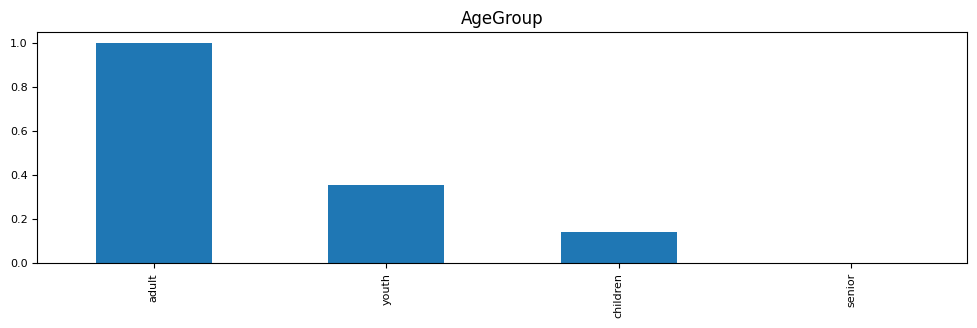

In [40]:
# Create age weight dictionary 
nage = train_data['AgeGroup'].nunique()
print(f'Number of AgeGroup  = {nage}')


# 1. Count and rank ages

ranking = range(1,nage+1)[::-1]
AgeGroup = train_data['AgeGroup'].value_counts().index.to_list()
rank_AgeGroup = dict( zip(AgeGroup, ranking))
print(f'Length ranking dictionary  = {len(rank_AgeGroup)}')


# 2. apply a pos/neg ratio to the rank
for key, val in rank_AgeGroup.items():
    pos = np.sum( [(train_target==1) & (train_data['AgeGroup']==key)] ) # when Class/ASD is yes and country is key
    neg = np.sum( [(train_target==0) & (train_data['AgeGroup']==key)] ) # when Class/ASD is no  and country is key
    assert pos+neg == (train_data['AgeGroup']==key).sum()
    if neg ==0:
        ratio = 0 # avoid zero-division error
    else:
        ratio = pos/neg
    rank_AgeGroup[key] = ratio*val # n_total

# 3. (0-1) normalize those ratios
mymax = np.max(list(rank_AgeGroup.values()))
mymin = np.min(list(rank_AgeGroup.values()))
normalize = lambda x: (x-mymin)/(mymax-mymin)
weight_AgeGroup = {key:normalize(val) for key,val in rank_AgeGroup.items()}
pd.Series(weight_AgeGroup).plot.bar(figsize=(12,3), fontsize=8, title='AgeGroup');


# Feature Engineering and Selection

The ColumnTransformer will apply the transformation to a single feature or list of features. Alternative method is to use common Pipelines where the Column transformation is defined at the initialization of the transformer. We will combine both methods.

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

In [42]:
class ContinentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, continent: dict) -> None:
        self.continent = continent
        self.df = None

    def get_feature_names_out(self) -> List[str]:
        if self.df is None:
            return ['None']
        return self.df.columns.tolist()

    def fit(self, X: pd.DataFrame, y=None):
        df = X.copy()

        # Ensure 'contry_of_res' is categorical
        if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
            df['contry_of_res'] = df['contry_of_res'].astype('category')

        # Correct known typos
        if 'American Samoa' not in df['contry_of_res'].cat.categories:
            df['contry_of_res'] = df['contry_of_res'].cat.add_categories('American Samoa')
        df.loc[df['contry_of_res'] == 'AmericanSamoa', 'contry_of_res'] = 'American Samoa'

        if 'Vietnam' not in df['contry_of_res'].cat.categories:
            df['contry_of_res'] = df['contry_of_res'].cat.add_categories('Vietnam')
        df.loc[df['contry_of_res'] == 'Viet Nam', 'contry_of_res'] = 'Vietnam'

        # Map continent
        df['continent'] = df['contry_of_res'].map(self.continent).astype('category')
        self.df = df
        return self

    def transform(self, X: pd.DataFrame = None) -> pd.DataFrame:
        df = X.copy()

        # Ensure 'contry_of_res' is categorical
        if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
            df['contry_of_res'] = df['contry_of_res'].astype('category')

        # Correct known typos
        if 'American Samoa' not in df['contry_of_res'].cat.categories:
            df['contry_of_res'] = df['contry_of_res'].cat.add_categories('American Samoa')
        df.loc[df['contry_of_res'] == 'AmericanSamoa', 'contry_of_res'] = 'American Samoa'

        if 'Vietnam' not in df['contry_of_res'].cat.categories:
            df['contry_of_res'] = df['contry_of_res'].cat.add_categories('Vietnam')
        df.loc[df['contry_of_res'] == 'Viet Nam', 'contry_of_res'] = 'Vietnam'

        # Map continent
        df['continent'] = df['contry_of_res'].map(self.continent).astype('category')
        return df

In [43]:
print("Vietnam" in continent)         # Should be True
print("American Samoa" in continent)  # Should be True


True
True


In [44]:
myregion = ContinentTransformer(continent = continent)
df_t = myregion.transform(X = train_data)

df_t[['contry_of_res','continent']] 


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):


,contry_of_res,continent
ID,,
1,United States,Americas
2,Australia,Oceania
3,United Kingdom,Europe
4,New Zealand,Oceania
5,Italy,Europe
...,...,...
796,United States,Americas
797,New Zealand,Oceania
798,Jordan,Asia


In [45]:
df_t.loc[77,['contry_of_res','continent']]

contry_of_res    Vietnam
continent           Asia
Name: 77, dtype: object

In [46]:
df_t.loc[318,['contry_of_res','continent']]

contry_of_res    American Samoa
continent               Oceania
Name: 318, dtype: object

In [47]:
train_data.isnull().sum().sort_values(ascending=False)


A1_Score           0
gender             0
relation           0
age_desc           0
result             0
used_app_before    0
contry_of_res      0
austim             0
jaundice           0
ethnicity          0
age                0
A2_Score           0
A10_Score          0
A9_Score           0
A8_Score           0
A7_Score           0
A6_Score           0
A5_Score           0
A4_Score           0
A3_Score           0
AgeGroup           0
dtype: int64

In [48]:
class WeightEncoder(BaseEstimator, TransformerMixin):
    """
    Custom feature for Label encoding based on weight 
    of categorical variables. The weight is based on the 
    relative proportion associated with the success of the
    dependent variable.
    
    To use it:
    >>> myrank = {'united states': 1, 'spain':10}
    >>> myfreq = WeightEncoder(col_name = ['country_of_res'], weight = myrank)
    >>> df = myfreq.fit_transform(X = train)
    
    It creates a new feature called 'w_col_name'.
    """

    def __init__(self, col_name:str, weight:dict)-> None:
        """
        Remove the list of features from a pandas 
        Dataframe object.
        
        Parameter
        ---------
        col_name:  the variable to remove
        rank: (dict) containg the variable and frequency to 
        be substitued (eg. myrank = {'united states': 1, 'spain':10}
        
        """

        self.col_name = col_name
        self.weight = weight
        self.df = None
   
       

    def fit(self, X:pd.DataFrame, y = None):
        """
        Remove the column lists and update dataset
        """
        df = X.copy()
                
        df['w_' + self.col_name] = df[self.col_name].map(self.weight).fillna(0)   
        self.df = df
        
        return self
   
    def transform(self, X:pd.DataFrame = None) -> pd.DataFrame:
        """
        Returns a pandas DataFrame with removed features.
        
        Parameter
        ---------
        dataframe:  Pandas DataFrame object
        """
        df = X.copy()
        
        # 0 if not found in dictionary
        df['w_' + self.col_name] = df[self.col_name].map(self.weight).fillna(0)
    
        return df

In [49]:
wencoder = WeightEncoder(col_name = 'contry_of_res', weight = weight_country)
df = wencoder.fit_transform(X = train_data)
df[['w_contry_of_res','contry_of_res']]

,w_contry_of_res,contry_of_res
ID,,
1,1.000000,United States
2,0.600252,Australia
3,0.659595,United Kingdom
4,0.091032,New Zealand
5,0.174863,Italy
...,...,...
796,1.000000,United States
797,0.091032,New Zealand
798,0.159113,Jordan


In [50]:
df.loc[77,['w_contry_of_res', 'contry_of_res']]

w_contry_of_res         0.0
contry_of_res      Viet Nam
Name: 77, dtype: object

In [51]:
train_data.isnull().sum().sort_values(ascending=False)


A1_Score           0
gender             0
relation           0
age_desc           0
result             0
used_app_before    0
contry_of_res      0
austim             0
jaundice           0
ethnicity          0
age                0
A2_Score           0
A10_Score          0
A9_Score           0
A8_Score           0
A7_Score           0
A6_Score           0
A5_Score           0
A4_Score           0
A3_Score           0
AgeGroup           0
dtype: int64

In [52]:
class DropperTransformer(BaseEstimator, TransformerMixin):
    """
    Custom feature dropper to add to custom Pipelines.
    To use it:
    >>> mydropper = DropperTransformer(features = ['age'])
    >>> df = mydropper.fit_transform(X = train)
    """

    def __init__(self, features:List[str])-> None:
        """
        Remove the list of features from a pandas 
        Dataframe object.
        
        Parameter
        ---------
        features:  (list) of variables to remove
        """

        self.features = features
        self.df = None
    
    
    def get_feature_names_out(self)-> List[str]:
        """
        Get column names (necessary for Pipelines)
        """
        if self.df is None:
            mycols = ['None']
        else:
            mycols =  self.df.columns.tolist()
            
        return mycols
        

    def fit(self, X:pd.DataFrame, y = None):
        """
        Remove the column lists and update dataset
        """
        df = X.copy()
        self.df = df.drop(self.features, axis = 1)
        
        return self
   
    def transform(self, X:pd.DataFrame = None) -> pd.DataFrame:
        """
        Returns a pandas DataFrame with removed features.
        
        Parameter
        ---------
        dataframe:  Pandas DataFrame object
        """
        df = X.copy()
        
        # Drop features
        self.df = df.drop(self.features, axis = 1)
        return self.df
        

In [53]:
mydropper = DropperTransformer(features = ['age_desc'])
mydropper.fit(train_data)
#df = mydropper.fit_transform(train)
for i, col in enumerate(mydropper.get_feature_names_out()):
    print(f'{i:2d} - {col}')

 0 - A1_Score
 1 - A2_Score
 2 - A3_Score
 3 - A4_Score
 4 - A5_Score
 5 - A6_Score
 6 - A7_Score
 7 - A8_Score
 8 - A9_Score
 9 - A10_Score
10 - age
11 - gender
12 - ethnicity
13 - jaundice
14 - austim
15 - contry_of_res
16 - used_app_before
17 - result
18 - relation
19 - AgeGroup


## Feature selection with Pearson's Chi-square Test
* $\chi^2$ statistic for testing binary categorical variables relationship to categorical. Chi-square is applied to categorical variables and is especially useful when those variables are nominal (where order doesn't matter, like marital status or gender).

The null hypothesis (H0) of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent. If the probability that the null hypothesis (H0) is higher than 5%, then the null hypothesis is valid (variables are thus independent). Note that I tend to use the test in the opposite direction (p<0.05 to test the dependency between variables)

In [54]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder

In [55]:
binary_features = ['gender', 'jaundice', 'austim', 'used_app_before']
binary_encoder = OneHotEncoder(sparse_output=False, drop= 'if_binary')
#foo = binary_encoder.fit_transform(train[binary_features])
#cols = binary_encoder.get_feature_names_out()

chi_score, p = chi2(X = binary_encoder.fit_transform(train_data[binary_features])  ,y = train_target)
star = p <= 0.05 # if they are dependent, probability of Ho (independency) must be lower than 5%
pd.DataFrame(zip(binary_features, chi_score, p, star), columns=['category', 'Chi-Square', 'p-value', 'P<0.05'])



,category,Chi-Square,p-value,P<0.05
0,gender,6.462530,1.101727e-02,True
1,jaundice,21.981247,2.753276e-06,True
2,austim,97.114903,6.541865e-23,True
3,used_app_before,0.192265,6.610378e-01,False


The null hypothesis (H0) of the Chi-Square test is that no relationship exists on the categorical variables in the population (i.e. the variable is indepedent). If we discard categorical variables with probability 5% or more, we discard **gender** and **used_app_before**.


In [56]:
# Note that A*_Score are also binary variables, we will test if they are related to the independent variable
mylist = [f'A{i}_Score' for i in range(1,10)]

chi_score, p = chi2(X = binary_encoder.fit_transform(train_data[mylist])  ,y = train_target)
star = p <= 0.05
pd.DataFrame(zip(mylist, chi_score, p, star), columns=['category', 'Chi-Square', 'p-value', 'P<0.05'])

# All A*_Scores are related (with probability of 95% or more) to the depedent variable.


,category,Chi-Square,p-value,P<0.05
0,A1_Score,28.087740,1.159380e-07,True
1,A2_Score,82.757731,9.275235e-20,True
2,A3_Score,164.029628,1.490354e-37,True
3,A4_Score,123.063444,1.350604e-28,True
4,A5_Score,87.289627,9.373823e-21,True
5,A6_Score,186.356096,1.984980e-42,True
6,A7_Score,90.494446,1.854969e-21,True
7,A8_Score,10.842539,9.919460e-04,True
8,A9_Score,158.731010,2.142467e-36,True


## Designing Preprocessing Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [58]:
country = ('country', ContinentTransformer(continent = continent)) # creates continent
w_country = ('weight_country', WeightEncoder(col_name = 'contry_of_res', weight = weight_country)) # creates w_contry_of_res 
w_ethnicity = ('weight_ethnicity', WeightEncoder(col_name = 'ethnicity', weight = weight_ethnicity)) # creates w_ethnicity
w_relation = ('weight_relation', WeightEncoder(col_name = 'relation', weight = weight_relation)) # creates w_relation
#w_age = ('weight_age', WeightEncoder(col_name = 'AgeGroup', weight=weight_AgeGroup)) # creates_w_AgeGroup

dropper = ('dropper', DropperTransformer(features = ['age_desc', 'gender', 'used_app_before','contry_of_res']))

in_process = (country, w_country, w_ethnicity, w_relation, dropper)
pipeline = Pipeline(steps = in_process)

df = pipeline.fit_transform(train_data)
#pipeline[1].get_feature_names_out()
for i,col in enumerate(pipeline[-1].get_feature_names_out()):
    print(f'[{i:2d}] -> {col}')

[ 0] -> A1_Score
[ 1] -> A2_Score
[ 2] -> A3_Score
[ 3] -> A4_Score
[ 4] -> A5_Score
[ 5] -> A6_Score
[ 6] -> A7_Score
[ 7] -> A8_Score
[ 8] -> A9_Score
[ 9] -> A10_Score
[10] -> age
[11] -> ethnicity
[12] -> jaundice
[13] -> austim
[14] -> result
[15] -> relation
[16] -> AgeGroup
[17] -> continent
[18] -> w_contry_of_res
[19] -> w_ethnicity
[20] -> w_relation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):


In [59]:
# =====================================================================
# Tuples for Pipeline contain only the 'key' & Transformers
# =====================================================================
country = ('country', ContinentTransformer(continent = continent)) # creates continent
w_country = ('weight_country', WeightEncoder(col_name = 'contry_of_res', weight = weight_country)) # creates w_contry_of_res 
w_ethnicity = ('weight_ethnicity', WeightEncoder(col_name = 'ethnicity', weight = weight_ethnicity)) # creates w_ethnicity
w_relation = ('weight_relation', WeightEncoder(col_name = 'relation', weight = weight_relation)) # creates w_relation
#w_age = ('weight_age', WeightEncoder(col_name = 'AgeGroup', weight=weight_AgeGroup)) # creates_w_AgeGroup

dropper = ('dropper', DropperTransformer(features = ['age_desc', 'gender', 'used_app_before','contry_of_res']))

# =====================================================================
# Tuples for ColumnTransformer contain only the 'key',Transformers,col
# =====================================================================
z_scoring = ('z_scoring', StandardScaler(), [10, 14] ) # age, result
binarize = ('binarize', OneHotEncoder(sparse_output=False, drop= 'if_binary'), [12,13] ) # jaundice, austim
one_hot =  ('one_hot',  OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [11,15,16,17] ) # ethnicity, relation, AgeGroup, ontinent

col_transformer = ColumnTransformer(transformers = (z_scoring, binarize, one_hot), remainder = 'passthrough')

col_preprocess = ('col_transformer', col_transformer)

preprocess = Pipeline( steps = (country, w_country, w_ethnicity, w_relation, dropper, col_preprocess))
preprocess

Pipeline(steps=(('country',
                 ContinentTransformer(continent={'Afghanistan': 'Asia',
                                                 'Albania': 'Europe',
                                                 'Algeria': 'Africa',
                                                 'American Samoa': 'Oceania',
                                                 'Andorra': 'Europe',
                                                 'Angola': 'Africa',
                                                 'Anguilla': 'Americas',
                                                 'Antarctica': 'Antarctica',
                                                 'Antigua and Barbuda': 'Americas',
                                                 'Argentina': 'Americas',
                                                 'Armenia': 'Asia',
                                                 'Aruba': 'Americas',
                                                 'Australia': 'Oceania',
                                                 'Austria'...
                 DropperTransformer(features=['age_desc', 'gender',
                                              'used_app_before',
                                              'contry_of_res'])),
                ('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=(('z_scoring', StandardScaler(),
                                                  [10, 14]),
                                                 ('binarize',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  [12, 13]),
                                                 ('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [11, 15, 16, 17]))))))

In [60]:
preprocess.fit(train_data) # we need to fit the pipeline to obtain get_features_names_out()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):


Pipeline(steps=[('country',
                 ContinentTransformer(continent={'Afghanistan': 'Asia',
                                                 'Albania': 'Europe',
                                                 'Algeria': 'Africa',
                                                 'American Samoa': 'Oceania',
                                                 'Andorra': 'Europe',
                                                 'Angola': 'Africa',
                                                 'Anguilla': 'Americas',
                                                 'Antarctica': 'Antarctica',
                                                 'Antigua and Barbuda': 'Americas',
                                                 'Argentina': 'Americas',
                                                 'Armenia': 'Asia',
                                                 'Aruba': 'Americas',
                                                 'Australia': 'Oceania',
                                                 'Austria'...
                 DropperTransformer(features=['age_desc', 'gender',
                                              'used_app_before',
                                              'contry_of_res'])),
                ('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=(('z_scoring', StandardScaler(),
                                                  [10, 14]),
                                                 ('binarize',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  [12, 13]),
                                                 ('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [11, 15, 16, 17]))))])

In [61]:
def remove_prefix(mystring:str)-> str:
    """
    Removes prefix until '__'
    e.g 'z_scoring__age' to 'age'
    """
    mystring = mystring.replace(r"__","*") # replace double underscore with *
    return mystring[mystring.find("*")+1:]

remove_prefix('z_scoring__age')

'age'

In [62]:
mycols = [remove_prefix(mystring= col_name) for col_name in preprocess[-1].get_feature_names_out()]
mycols

['age',
 'result',
 'jaundice_yes',
 'austim_yes',
 'ethnicity_?',
 'ethnicity_Asian',
 'ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Latino',
 'ethnicity_Middle Eastern ',
 'ethnicity_Others',
 'ethnicity_Pasifika',
 'ethnicity_South Asian',
 'ethnicity_Turkish',
 'ethnicity_White-European',
 'relation_?',
 'relation_Health care professional',
 'relation_Parent',
 'relation_Relative',
 'relation_Self',
 'AgeGroup_adult',
 'AgeGroup_children',
 'AgeGroup_senior',
 'AgeGroup_youth',
 'continent_Africa',
 'continent_Americas',
 'continent_Asia',
 'continent_Europe',
 'continent_Oceania',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'w_contry_of_res',
 'w_ethnicity',
 'w_relation']

In [63]:
from sklearn.preprocessing import FunctionTransformer

pandarized = ("pandarizer",FunctionTransformer(lambda x: pd.DataFrame(x, columns = mycols)))
preprocess = Pipeline( steps = (country, w_country, w_ethnicity, w_relation, dropper, col_preprocess, pandarized))

In [64]:
# Exploration: there are no missing values in both train and test datasets
assert train_data.isnull().values.any() == False, 'train dataset contains missing values'
assert test_data.isnull().values.any() == False, 'test dataset contains missing values'


In [65]:
# Check the number of resulting variables are the same
preprocess.fit_transform(X=train_data).shape 
preprocess.transform(X=test_data).shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):


(200, 42)

In [66]:
# We first apply the preprocessing pipeline
Xtrain = preprocess.fit_transform(X = train_data)
Xtest = preprocess.transform(X = test_data)

# check resulting variables are the same after preprocessing
assert (Xtrain.shape[1] == Xtest.shape[1]), 'train and set contain different number of independent variables'

# check the same number of independent variables
assert (Xtrain.shape[0] == train_target.shape[0]), 'train changed the number of observations'

Xtrain.shape, Xtest.shape, train_target.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\947416153.py:36: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['contry_of_res']):


((800, 42), (200, 42), (800,))

### OverSampling


In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [68]:
sm = SMOTEENN(enn = EditedNearestNeighbours(sampling_strategy='all', kind_sel="mode"), random_state = 42, n_jobs =-1)
ov_Xtrain, ov_ytrain = sm.fit_resample(X = Xtrain, y = train_target)

In [69]:
ov_ytrain.value_counts() # Balanced Data

Class/ASD
1    601
0    498
Name: count, dtype: int64

In [70]:
train_target.value_counts() # Unbalanced Data

Class/ASD
0    615
1    185
Name: count, dtype: int64

In [71]:
ov_Xtrain.shape, ov_ytrain.shape

((1099, 42), (1099,))

#### Cross-validation strategy:
The performance of the models is very high when training with the whole dataset. Therefore, we will train the models with the oversampled (balanced) dataset (**ov_Xtrain, ov_ytrain**) and test against the original (unbalanced) dataset (**Xtrain, train_target**). 

We select a cross-validation size of four (800/4) to match approximately the number of samples used to evaluate the competition (n =200).

## Training



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import BernoulliNB


# 1. Instances of all models 
RF_clf = RandomForestClassifier(random_state = 42)
AD_clf = AdaBoostClassifier(random_state = 42)
GB_clf = GradientBoostingClassifier(random_state=42)
ET_clf = ExtraTreesClassifier(random_state = 42)

LR_clf = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500)
DT_clf = DecisionTreeClassifier(random_state=42)

KN_clf = KNeighborsClassifier( )
SVC_clf = SVC(degree=10, probability = True, random_state = 42)

NB_clf = BernoulliNB( )



In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# We Test with one-third of the dataset for simplicity
X_train, X_test, y_train, y_test = train_test_split(ov_Xtrain, ov_ytrain, test_size=1/3., random_state=42)

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
RF_clf = RandomForestClassifier(random_state = 42)

In [77]:
# train 
RF_clf.fit(X = X_train, y = y_train) # training with 2/3 of the balanced data

prediction = RF_clf.predict(X = X_test) # predict the rest 1/3 of the balanced data

print(classification_report(y_test, prediction)) # accuracy 0.97
print("Accuracy:", accuracy_score(y_test, prediction))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       174
           1       0.99      0.95      0.97       193

    accuracy                           0.97       367
   macro avg       0.97      0.97      0.97       367
weighted avg       0.97      0.97      0.97       367

Accuracy: 0.9673024523160763


In [78]:
prediction_unbalanced = RF_clf.predict(Xtrain)  # original unbalanced train data
print(classification_report(train_target, prediction_unbalanced))
print("ROC AUC:", roc_auc_score(train_target, RF_clf.predict_proba(Xtrain)[:, 1]))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       615
           1       0.71      0.90      0.80       185

    accuracy                           0.89       800
   macro avg       0.84      0.90      0.86       800
weighted avg       0.91      0.89      0.90       800

ROC AUC: 0.9578905735003297


In [79]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(RF_clf, ov_Xtrain, ov_ytrain, cv=cv, scoring='roc_auc')
print("Mean CV ROC AUC:", np.mean(cv_scores))

Mean CV ROC AUC: 0.9959573781896095


In [80]:
def plot_metrics(model, X:np.array, y_target:np.array) -> plt.figure:
    """
    Plots confusion matrix and Receiver Operating Characteristic
    (ROC) curve of the classifier
    
    Arguments:
    ----------
    predictor
    X (array): input matrix
    y_target (array) : target vector
    """
    prediction = model.predict( X )
    
    # Compute donfusion matrix
    cm = confusion_matrix(y_target, prediction, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    fig.tight_layout(pad = 3, h_pad = 2, w_pad = 4)
    fig.suptitle(type(model).__name__)
    ax[0] = disp.plot(ax = ax[0])

    
    # ROC curve
    y_pred_prob = model.predict_proba(X)[::,1]
    test_FP, test_TP, thresholds = roc_curve(y_target ,y_pred_prob)
    auc = roc_auc_score(y_target, y_pred_prob)
    
    ax[1].plot(test_FP, test_TP, color='C0', label = f'AUC = {auc:2.2f}')
    ax[1].plot([0, 1], [0, 1],'r--', lw=1)

    ax[1].legend(loc =4, fontsize=10);

    ax[1].set_ylabel('True Positive (TP)', fontsize=10);
    ax[1].set_xlabel('False Positive (FP)', fontsize=10);

    ax[1].set_title('Receiver Operating Characteristic (ROC) curve', fontsize=10);
    
    #return fig

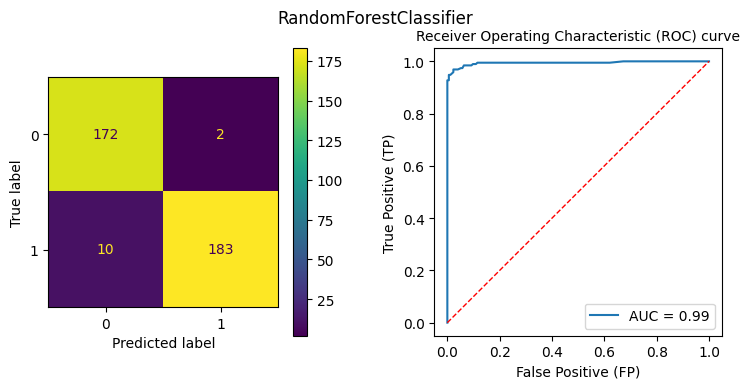

In [81]:
# RandomForest performance on test dataset (1/3 of the training dataset)
plot_metrics(model = RF_clf,  X = X_test, y_target = y_test)

In [82]:
#ROC Score on unbalanced dataset that simulates real world data
print("ROC AUC on unbalanced data:", roc_auc_score(train_target, RF_clf.predict_proba(Xtrain)[:, 1]))
cv_score = cross_val_score(estimator = RF_clf, X = Xtrain, y = train_target, scoring = "roc_auc", cv = 4, n_jobs=-1)
print(np.mean(cv_score), np.std(cv_score))

ROC AUC on unbalanced data: 0.9578905735003297
0.9028740312036008 0.03957259813503189


### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
LR_clf = LogisticRegression(random_state = 42,solver='liblinear')

In [85]:

LR_clf.fit(X = X_train, y = y_train) # training with 2/3 of the data

prediction = LR_clf.predict(X = X_test) # predict the rest 1/3 

print(classification_report(y_test, prediction)) # accuracy 0.92
print("Accuracy:", accuracy_score(y_test, prediction)) # accuracy 0.97

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       174
           1       0.93      0.91      0.92       193

    accuracy                           0.92       367
   macro avg       0.92      0.92      0.92       367
weighted avg       0.92      0.92      0.92       367

Accuracy: 0.9182561307901907


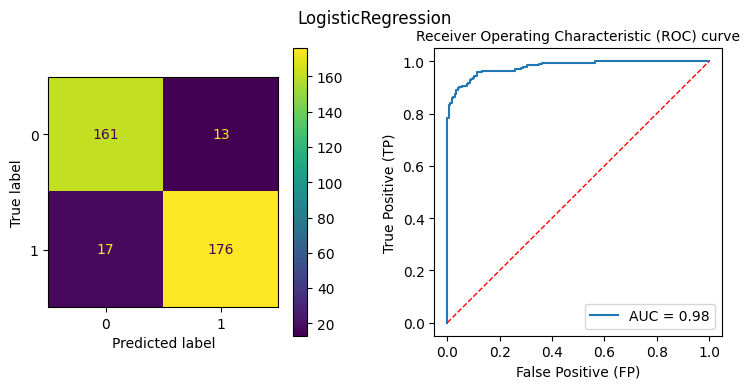

In [86]:
# Logistic Regression performance on test dataset (1/5 of the training dataset)
plot_metrics(model = LR_clf,  X = X_test, y_target = y_test)

In [87]:
#ROC Score on unbalanced dataset that simulates real world data
print("ROC AUC on unbalanced data:", roc_auc_score(train_target, RF_clf.predict_proba(Xtrain)[:, 1]))
cv_score = cross_val_score(estimator = RF_clf, X = Xtrain, y = train_target, scoring = "roc_auc", cv = 4, n_jobs=-1)
print(np.mean(cv_score), np.std(cv_score))

ROC AUC on unbalanced data: 0.9578905735003297
0.9028740312036008 0.03957259813503189


### Decision_Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

In [89]:
DT_clf = DecisionTreeClassifier(random_state=42)

In [90]:
ET_clf = ExtraTreesClassifier(random_state=42)

In [91]:

ET_clf.fit(X = X_train, y = y_train) # training with 2/3 of the data

prediction = ET_clf.predict(X = X_test) # predict the rest 1/3 

print(classification_report(y_test, prediction)) # accuracy 0.98
print("Accuracy:", accuracy_score(y_test, prediction)) # accuracy 0.98

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       174
           1       0.98      0.97      0.98       193

    accuracy                           0.98       367
   macro avg       0.98      0.98      0.98       367
weighted avg       0.98      0.98      0.98       367

Accuracy: 0.9754768392370572


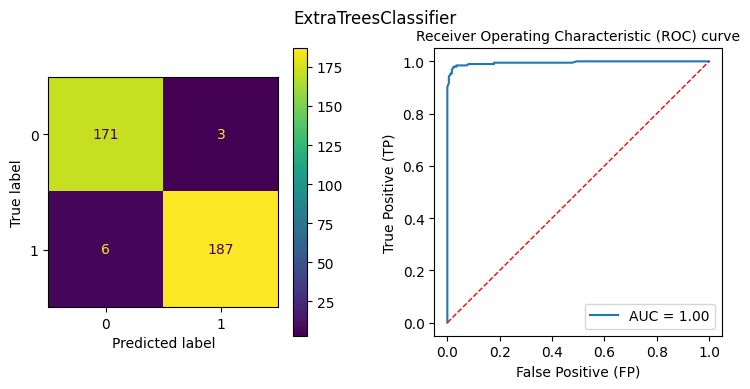

In [92]:
# Logistic Regression performance on test dataset (1/3 of the training dataset)
plot_metrics(model = ET_clf,  X = X_test, y_target = y_test)

In [93]:
#ROC Score on unbalanced dataset that simulates real world data
print("ROC AUC on unbalanced data:", roc_auc_score(train_target, ET_clf.predict_proba(Xtrain)[:, 1]))
cv_score = cross_val_score(estimator = ET_clf, X = Xtrain, y = train_target, scoring = "roc_auc", cv = 4, n_jobs=-1)
print(np.mean(cv_score), np.std(cv_score))

ROC AUC on unbalanced data: 0.973891452428038
0.896524468069402 0.034714295757365676


### Gradient Boosting


In [94]:
GB_clf.fit(X = X_train, y = y_train) # training with 2/3 of the data

prediction = GB_clf.predict(X = X_test) # predict the rest 1/3 

print(classification_report(y_test, prediction)) # accuracy 0.96
print("Accuracy:", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       174
           1       0.99      0.94      0.97       193

    accuracy                           0.96       367
   macro avg       0.96      0.97      0.96       367
weighted avg       0.97      0.96      0.96       367

Accuracy: 0.9645776566757494


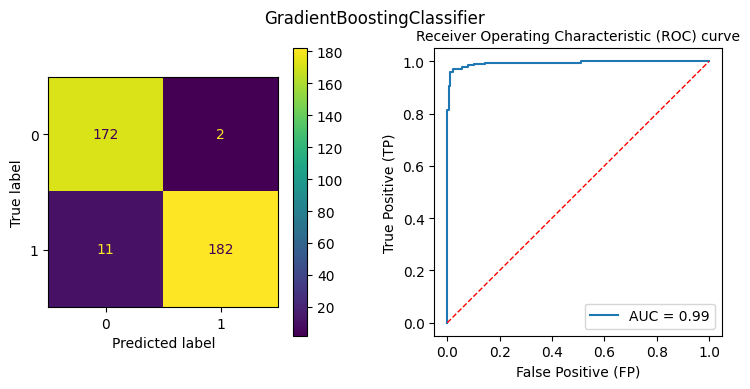

In [95]:
# Gradient Boosting performance on test dataset (1/3 of the training dataset)
plot_metrics(model = GB_clf,  X = X_test, y_target = y_test)

In [96]:
#ROC Score on unbalanced dataset that simulates real world data
print("ROC AUC on unbalanced data:", roc_auc_score(train_target, GB_clf.predict_proba(Xtrain)[:, 1]))
cv_score = cross_val_score(estimator = GB_clf, X = Xtrain, y = train_target, scoring = "roc_auc", cv = 4, n_jobs=-1)
print(np.mean(cv_score), np.std(cv_score))

ROC AUC on unbalanced data: 0.9464689079323226
0.9041553261059981 0.040454679965974974


### SHAP Importance

[SHAP] is a visualization tool that plots the contribution of each feature to the predictions of a model.It is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence. We shall use Random Forest and Decission Tree models for our feature importance calculations.

In [97]:
import shap
shap.__version__

'0.48.0'

#### Shap Importances for Random Forest

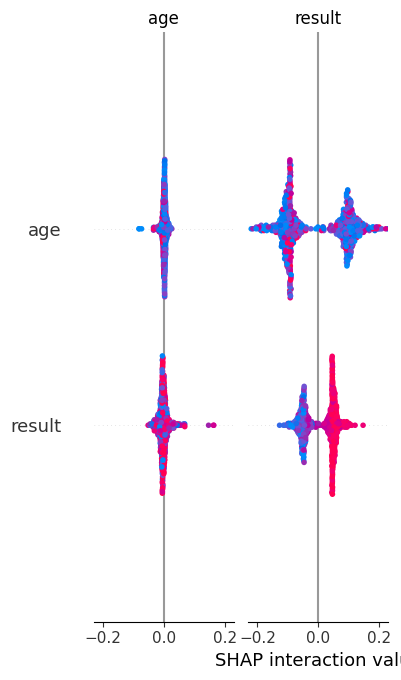

In [98]:
# For random forest
explainer = shap.TreeExplainer(RF_clf)

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features = X_train, plot_type='bar', plot_size=(5,5))


### SHAP importances for Extra Tree

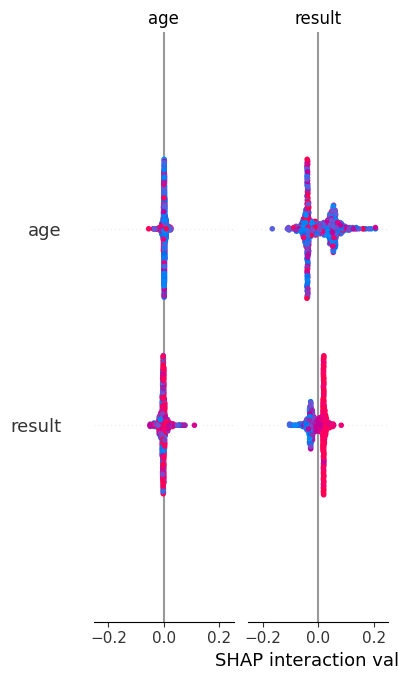

In [99]:
# For Extra Tree
explainer = shap.TreeExplainer(ET_clf)

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features = X_train, plot_type='bar', plot_size=(3,5))

### Shap Importances for Gradient Boosting

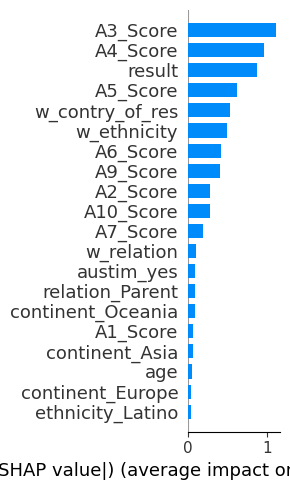

In [100]:
explainer = shap.TreeExplainer(GB_clf)

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features = X_train, plot_type='bar', plot_size=(3,5))

## Testing All Models

In [101]:
classifiers = [RF_clf, AD_clf, ET_clf, LR_clf, DT_clf, KN_clf, SVC_clf, NB_clf, GB_clf]
print(f'We test {len(classifiers)} classifiers')

We test 9 classifiers


In [102]:

from sklearn.model_selection import StratifiedKFold

# We use a 4-fold cross validation of Xtrain, that creates 200 entries blocks
myKFold = StratifiedKFold(n_splits = 4, shuffle = True, random_state=42) #

In [103]:
mydict = dict()

name = list()
roc_score = list()
stdev =  list()

for clf in classifiers:
    name.append(type(clf).__name__)
    clf.fit(X = ov_Xtrain, y = ov_ytrain ) # train balanced dataset
    mycv = cross_val_score(clf, Xtrain, y = train_target, scoring = "roc_auc", cv = myKFold, n_jobs=-1) # score unbalanced dataset
    roc_score.append( np.mean(mycv)*100 )
    stdev.append( np.std(mycv) *100)

mydict['Classifier'] = name
mydict['roc_auc(%)'] = roc_score
mydict['stdev(%)'] = stdev

mybase = pd.DataFrame.from_dict(mydict).set_index('Classifier')
mybase

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,roc_auc(%),stdev(%)
Classifier,,
RandomForestClassifier,90.040236,1.251976
AdaBoostClassifier,86.624643,2.789708
ExtraTreesClassifier,89.303205,1.719400
LogisticRegression,91.089933,1.176498
DecisionTreeClassifier,77.220204,1.706721
KNeighborsClassifier,86.453319,1.333898
SVC,89.200403,1.327332
BernoulliNB,92.130917,1.274139
GradientBoostingClassifier,90.910947,1.043017


In [104]:
mybase[mybase['roc_auc(%)']>90]

,roc_auc(%),stdev(%)
Classifier,,
RandomForestClassifier,90.040236,1.251976
LogisticRegression,91.089933,1.176498
BernoulliNB,92.130917,1.274139
GradientBoostingClassifier,90.910947,1.043017


In [105]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [106]:

# ================================================
# Random Forest 
# ================================================
param_RF = {}
param_RF['classifier__n_estimators'] = [10, 50, 100, 250]
param_RF['classifier__max_features'] = ['auto', 'sqrt', 'log2']
param_RF['classifier__max_depth'] = [5, 10, 20]
param_RF['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_RF['classifier'] = [RF_clf]

# ================================================
# Adaboost 
# ================================================
param_AD = {}
param_AD['classifier__n_estimators'] =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
param_AD['classifier__learning_rate'] =  [(0.97 + x / 100) for x in range(0, 8)]
param_AD['classifier__algorithm'] =  ['SAMME', 'SAMME.R']
param_AD['classifier'] = [AD_clf]

# ================================================
# Logistic Regression
# ================================================
param_LR = {}
param_LR['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param_LR['classifier__penalty'] = ['l1', 'l2']
param_LR['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_LR['classifier'] = [LR_clf]

# ================================================
# Decission Tree
# ================================================
param_DT = {}
param_DT['classifier__max_depth'] = [5,10,25,None]
param_DT['classifier__min_samples_leaf'] = [2,5,10]
param_DT['classifier__criterion'] = ["gini", "entropy"]
param_DT['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_DT['classifier'] = [DT_clf]

# ================================================
# Extra Trees
# ================================================
param_ET = {}
param_ET['classifier__max_depth'] = [5,10,25,None]
param_ET['classifier__max_features'] = [2,5,10]
param_ET['classifier__min_samples_split'] = [2,3,10]
param_ET['classifier__min_samples_leaf'] = [1,3,10]
param_ET['classifier__bootstrap'] = [False]
param_ET['classifier__n_estimators'] = [100,300]
param_ET['classifier__criterion'] = ['gini']
param_ET['classifier'] = [ET_clf]

# ================================================
# k-Nearest Neighbours
# ================================================
param_KN = {}
param_KN['classifier__n_neighbors'] = [5,7,9,11,13,15]
#param_KN['classifier__weights'] = ['uniform','distance']
#param_KN['classifier__metric'] = ['minkowski','euclidean','manhattan']
param_KN['classifier'] = [KN_clf]

# ================================================
# Support Vector Classifier
# ================================================
param_SVC = {}
param_SVC['classifier__C'] =  [0.1, 1, 10, 100] 
param_SVC['classifier__gamma'] = [1.0, 0.1, 0.01, 0.001]
param_SVC['classifier__kernel'] = ['rbf', 'poly', 'sigmoid']
param_SVC['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_SVC['classifier'] = [SVC_clf]

# ================================================
# Naive Bayes
# ================================================
param_NB = {}
param_NB['classifier__alpha'] = np.logspace(0,-9, num=100)
param_NB['classifier'] = [NB_clf]

# ================================================
# Gradient Boosting
# ================================================
param_GB = {}
param_GB['classifier__n_estimators'] = [10, 50, 100, 250]
param_GB['classifier__max_depth'] = [5, 10, 20]
param_GB['classifier'] = [GB_clf]

In [107]:
# IList the hyperparameter dictionary and prepare a pipeline of the 1st classifier
pipeline = Pipeline([('classifier', RF_clf)])
myparams = [param_RF, param_AD, param_LR, param_DT, param_KN, param_ET, param_SVC, param_NB, param_GB]

In [108]:
%%time
# Train a RandomizedSearchCV model with the pipeline and parameter dictionary list.

mymodel = RandomizedSearchCV(pipeline, myparams, cv=myKFold, n_jobs=-1, scoring='roc_auc').fit(X = ov_Xtrain, y = ov_ytrain)

CPU times: total: 656 ms
Wall time: 839 ms


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [109]:
mymodel.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=20, random_state=42))])

In [110]:
mymodel.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 20,
 'classifier__class_weight': None,
 'classifier': RandomForestClassifier(random_state=42)}

## Some More Models

XGBoost, LightGBM, CatBoost

In [111]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [112]:
XGB_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
LGB_clf = LGBMClassifier(random_state=42)
CAT_clf = CatBoostClassifier(verbose=0, random_state=42)


In [113]:
X_train, X_test, y_train, y_test = train_test_split(ov_Xtrain, ov_ytrain, test_size=1/3., random_state=42)

for model, name in zip([XGB_clf, LGB_clf, CAT_clf], ['XGBoost', 'LightGBM', 'CatBoost']):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]
    
    print(f"\n{name} Results")
    print(classification_report(y_test, preds))
    print("Accuracy:", accuracy_score(y_test, preds))
    print("ROC AUC:", roc_auc_score(y_test, proba))


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:25:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       174
           1       0.98      0.95      0.97       193

    accuracy                           0.97       367
   macro avg       0.97      0.97      0.97       367
weighted avg       0.97      0.97      0.97       367

Accuracy: 0.9673024523160763
ROC AUC: 0.9944613185635162
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 408, number of negative: 324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 732, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557377 -> initscore=0.230524
[LightGBM] [Info] Star

In [114]:
from sklearn.model_selection import cross_val_score

for model, name in zip([XGB_clf, LGB_clf, CAT_clf], ['XGBoost', 'LightGBM', 'CatBoost']):
    scores = cross_val_score(model, Xtrain, train_target, scoring='roc_auc', cv=4, n_jobs=-1)
    print(f"{name} Mean CV ROC AUC: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


XGBoost Mean CV ROC AUC: 0.8848 ± 0.0417
LightGBM Mean CV ROC AUC: 0.8957 ± 0.0424
CatBoost Mean CV ROC AUC: 0.9053 ± 0.0407


### Evaluation On Unbalanced Dataset

In [115]:
for model, name in zip([XGB_clf, LGB_clf, CAT_clf], ['XGBoost', 'LightGBM', 'CatBoost']):
    # Predict probabilities and labels on original (unbalanced) data
    unbal_preds = model.predict(Xtrain)
    unbal_proba = model.predict_proba(Xtrain)[:, 1]

    print(f"\n{name} on Unbalanced Original Training Data")
    print(classification_report(train_target, unbal_preds))
    print("Accuracy:", accuracy_score(train_target, unbal_preds))
    print("ROC AUC:", roc_auc_score(train_target, unbal_proba))



XGBoost on Unbalanced Original Training Data
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       615
           1       0.72      0.90      0.80       185

    accuracy                           0.90       800
   macro avg       0.85      0.90      0.87       800
weighted avg       0.91      0.90      0.90       800

Accuracy: 0.8975
ROC AUC: 0.9472116018457482

LightGBM on Unbalanced Original Training Data
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       615
           1       0.73      0.89      0.80       185

    accuracy                           0.90       800
   macro avg       0.85      0.90      0.87       800
weighted avg       0.91      0.90      0.90       800

Accuracy: 0.9
ROC AUC: 0.949901120632828

CatBoost on Unbalanced Original Training Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       615
           

ValueError: Unknown format code 'f' for object of type 'str'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\4060735734.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CV ROC AUC", y="Model", data=df_results, palette="crest")


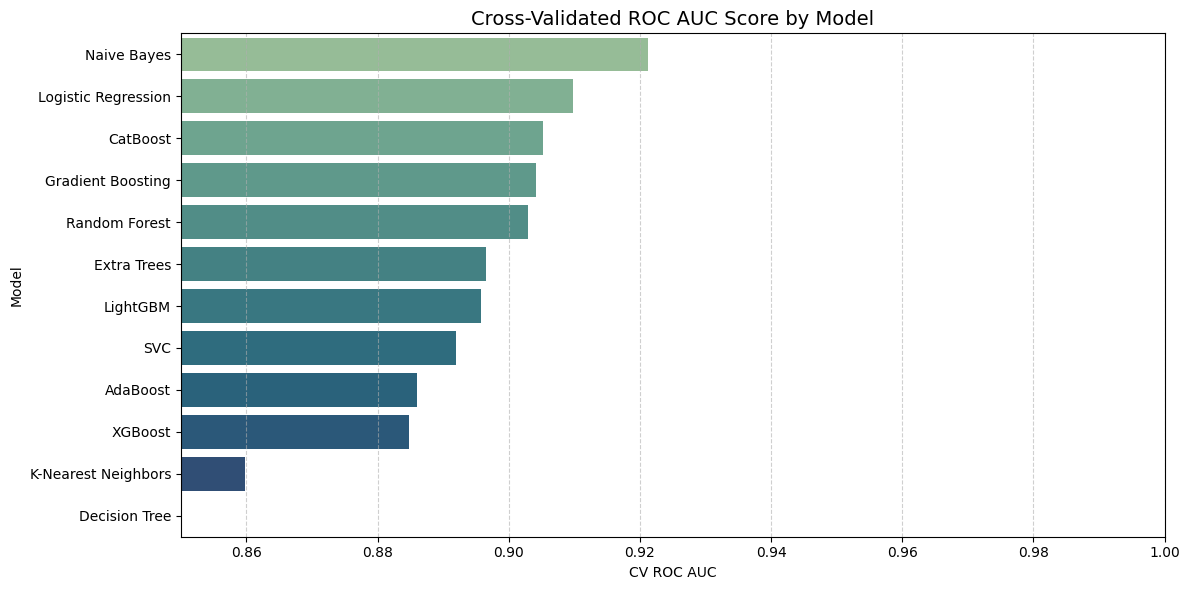

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns

# List of all classifiers that are trained
all_classifiers = [
    ("Random Forest", RF_clf),
    ("AdaBoost", AD_clf),
    ("Gradient Boosting", GB_clf),
    ("Extra Trees", ET_clf),
    ("Logistic Regression", LR_clf),
    ("Decision Tree", DT_clf),
    ("K-Nearest Neighbors", KN_clf),
    ("SVC", SVC_clf),
    ("Naive Bayes", NB_clf),
    ("XGBoost", XGB_clf),
    ("LightGBM", LGB_clf),
    ("CatBoost", CAT_clf),
]

#Metrics dictionary
results = []

for name, model in all_classifiers:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    cv_score = cross_val_score(model, Xtrain, train_target, scoring='roc_auc', cv=4, n_jobs=-1).mean()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC AUC": roc,
        "CV ROC AUC": cv_score
    })

# Create and sort DataFrame
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="CV ROC AUC", ascending=False).reset_index(drop=True)

# Display styled table
styled_table = df_results.style.background_gradient(
    cmap='viridis', subset=["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC", "CV ROC AUC"]
).format("{:.3f}").set_caption("Final Model Performance Comparison")

display(styled_table)

# Plot CV ROC AUC for all models
plt.figure(figsize=(12, 6))
sns.barplot(x="CV ROC AUC", y="Model", data=df_results, palette="crest")
plt.title("Cross-Validated ROC AUC Score by Model", fontsize=14)
plt.xlabel("CV ROC AUC")
plt.ylabel("Model")
plt.xlim(0.85, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<>:75: SyntaxWarning: invalid escape sequence '\F'
<>:75: SyntaxWarning: invalid escape sequence '\F'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2938363162.py:75: SyntaxWarning: invalid escape sequence '\F'
  print("\Final Model Performance Comparison:\n")


,Model,Accuracy,Precision,Recall,F1-score,ROC AUC,CV ROC AUC
0,Naive Bayes,0.932,0.967,0.902,0.933,0.986,0.921
1,Logistic Regression,0.929,0.951,0.912,0.931,0.985,0.910
2,CatBoost,0.978,0.989,0.969,0.979,0.995,0.905
3,Gradient Boosting,0.995,1.000,0.990,0.995,1.000,0.904
4,Random Forest,1.000,1.000,1.000,1.000,1.000,0.903
5,Extra Trees,1.000,1.000,1.000,1.000,1.000,0.897
6,LightGBM,0.962,0.984,0.943,0.963,0.994,0.896
7,SVC,0.981,1.000,0.964,0.982,0.998,0.892
8,AdaBoost,0.973,0.979,0.969,0.974,0.998,0.886
9,XGBoost,0.967,0.984,0.953,0.968,0.994,0.885


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2938363162.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CV ROC AUC", y="Model", data=df_results, palette="crest")


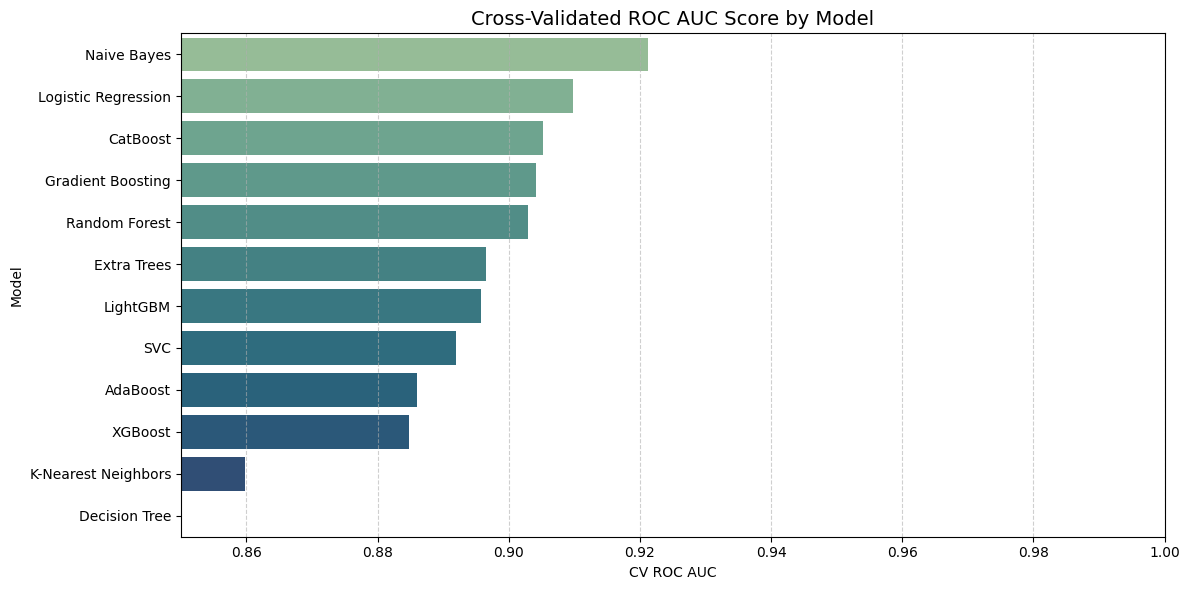

\Final Model Performance Comparison:

              Model  Accuracy  Precision  Recall  F1-score  ROC AUC  CV ROC AUC
        Naive Bayes     0.932      0.967   0.902     0.933    0.986       0.921
Logistic Regression     0.929      0.951   0.912     0.931    0.985       0.910
           CatBoost     0.978      0.989   0.969     0.979    0.995       0.905
  Gradient Boosting     0.995      1.000   0.990     0.995    1.000       0.904
      Random Forest     1.000      1.000   1.000     1.000    1.000       0.903
        Extra Trees     1.000      1.000   1.000     1.000    1.000       0.897
           LightGBM     0.962      0.984   0.943     0.963    0.994       0.896
                SVC     0.981      1.000   0.964     0.982    0.998       0.892
           AdaBoost     0.973      0.979   0.969     0.974    0.998       0.886
            XGBoost     0.967      0.984   0.953     0.968    0.994       0.885
K-Nearest Neighbors     0.989      0.985   0.995     0.990    1.000       0.860
  

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of all classifiers you've trained
all_classifiers = [
    ("Random Forest", RF_clf),
    ("AdaBoost", AD_clf),
    ("Gradient Boosting", GB_clf),
    ("Extra Trees", ET_clf),
    ("Logistic Regression", LR_clf),
    ("Decision Tree", DT_clf),
    ("K-Nearest Neighbors", KN_clf),
    ("SVC", SVC_clf),
    ("Naive Bayes", NB_clf),
    ("XGBoost", XGB_clf),
    ("LightGBM", LGB_clf),
    ("CatBoost", CAT_clf),
]

# Collect results in list of dicts
results = []

for name, model in all_classifiers:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = float(accuracy_score(y_test, y_pred))
    prec = float(precision_score(y_test, y_pred))
    rec = float(recall_score(y_test, y_pred))
    f1 = float(f1_score(y_test, y_pred))
    roc = float(roc_auc_score(y_test, y_proba))
    cv_score = float(cross_val_score(model, Xtrain, train_target, scoring='roc_auc', cv=4, n_jobs=-1).mean())

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC AUC": roc,
        "CV ROC AUC": cv_score
    })

# Create and sort DataFrame
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="CV ROC AUC", ascending=False).reset_index(drop=True)

#Style the table
styled_table = df_results.style.background_gradient(
    cmap='viridis',
    subset=["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC", "CV ROC AUC"]
).format({
    "Accuracy": "{:.3f}",
    "Precision": "{:.3f}",
    "Recall": "{:.3f}",
    "F1-score": "{:.3f}",
    "ROC AUC": "{:.3f}",
    "CV ROC AUC": "{:.3f}",
}).set_caption("Final Model Performance Comparison")

display(styled_table)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="CV ROC AUC", y="Model", data=df_results, palette="crest")
plt.title("Cross-Validated ROC AUC Score by Model", fontsize=14)
plt.xlabel("CV ROC AUC")
plt.ylabel("Model")
plt.xlim(0.85, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


print("\Final Model Performance Comparison:\n")
print(df_results.to_string(index=False, float_format="%.3f"))


In [120]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier with soft voting
ensemble_clf = VotingClassifier(
    estimators=[
        ('nb', NB_clf),
        ('lr', LR_clf),
        ('cat', CAT_clf)
    ],
    voting='soft',  # Soft uses predicted probabilities, better for imbalanced
    weights=[1, 2, 3], # Can adjust weights based on model performance
    n_jobs=-1
)

# Fit on balanced data
ensemble_clf.fit(ov_Xtrain, ov_ytrain)


VotingClassifier(estimators=[('nb', BernoulliNB()),
                             ('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000002087FE31D00>)],
                 n_jobs=-1, voting='soft', weights=[1, 2, 3])

In [121]:
from sklearn.metrics import classification_report, roc_auc_score

# On balanced test set
y_pred = ensemble_clf.predict(X_test)
y_proba = ensemble_clf.predict_proba(X_test)[:, 1]

print("\Ensemble Performance on Balanced Test Set:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# On original (unbalanced) dataset
y_pred_unbalanced = ensemble_clf.predict(Xtrain)
y_proba_unbalanced = ensemble_clf.predict_proba(Xtrain)[:, 1]

print("\Ensemble Performance on Unbalanced Original Data:")
print(classification_report(train_target, y_pred_unbalanced))
print("ROC AUC:", roc_auc_score(train_target, y_proba_unbalanced))


\Ensemble Performance on Balanced Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       174
           1       1.00      0.99      0.99       193

    accuracy                           0.99       367
   macro avg       0.99      0.99      0.99       367
weighted avg       0.99      0.99      0.99       367

ROC AUC: 0.9999404442856292
\Ensemble Performance on Unbalanced Original Data:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       615
           1       0.71      0.92      0.80       185

    accuracy                           0.89       800
   macro avg       0.84      0.90      0.86       800
weighted avg       0.91      0.89      0.90       800

ROC AUC: 0.9506130520764668


<>:7: SyntaxWarning: invalid escape sequence '\E'
<>:15: SyntaxWarning: invalid escape sequence '\E'
<>:7: SyntaxWarning: invalid escape sequence '\E'
<>:15: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\4079042682.py:7: SyntaxWarning: invalid escape sequence '\E'
  print("\Ensemble Performance on Balanced Test Set:")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\4079042682.py:15: SyntaxWarning: invalid escape sequence '\E'
  print("\Ensemble Performance on Unbalanced Original Data:")


In [122]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

ensemble_cv_score = cross_val_score(ensemble_clf, Xtrain, train_target, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f"\nEnsemble Cross-Validated ROC AUC: {ensemble_cv_score.mean():.4f} ± {ensemble_cv_score.std():.4f}")



Ensemble Cross-Validated ROC AUC: 0.9117 ± 0.0207


### Ensemble Model using NaiveBayes, Logistic Regression, CatBoost, Gradient Boosting, XGBoost

In [123]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners
base_learners = [
    ('nb', NB_clf),
    ('lr', LR_clf),
    ('cat', CAT_clf),
    ('gb', GB_clf),
    ('xgb', XGB_clf)
]

# Meta learner (can also try CatBoost or XGB here)
meta_learner = LogisticRegression(random_state=42, solver='liblinear')

# Stacking ensemble
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,  # Gives final_estimator access to original features
    n_jobs=-1
)

stack_clf.fit(ov_Xtrain, ov_ytrain)


StackingClassifier(estimators=[('nb', BernoulliNB()),
                               ('lr',
                                LogisticRegression(random_state=42,
                                                   solver='liblinear')),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x000002087FE31D00>),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsam...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(random_state=42,
                                                      solver='liblinear'),
                   n_jobs=-1, passthrough=True)

In [124]:
y_pred_stack = stack_clf.predict(X_test)
y_proba_stack = stack_clf.predict_proba(X_test)[:, 1]

print("\Stacking Performance on Balanced Test Set:")
print(classification_report(y_test, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_test, y_proba_stack))

y_pred_stack_unbal = stack_clf.predict(Xtrain)
y_proba_stack_unbal = stack_clf.predict_proba(Xtrain)[:, 1]

print("\Stacking Performance on Unbalanced Data:")
print(classification_report(train_target, y_pred_stack_unbal))
print("ROC AUC:", roc_auc_score(train_target, y_proba_stack_unbal))


\Stacking Performance on Balanced Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       193

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367

ROC AUC: 1.0
\Stacking Performance on Unbalanced Data:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       615
           1       0.72      0.96      0.82       185

    accuracy                           0.91       800
   macro avg       0.85      0.92      0.88       800
weighted avg       0.92      0.91      0.91       800

ROC AUC: 0.9449615469127665


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\1488665764.py:4: SyntaxWarning: invalid escape sequence '\S'
  print("\Stacking Performance on Balanced Test Set:")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\1488665764.py:11: SyntaxWarning: invalid escape sequence '\S'
  print("\Stacking Performance on Unbalanced Data:")


In [125]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stack_cv_score = cross_val_score(stack_clf, Xtrain, train_target, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f"\Stacking Cross-Validated ROC AUC: {stack_cv_score.mean():.4f} ± {stack_cv_score.std():.4f}")


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2204916473.py:3: SyntaxWarning: invalid escape sequence '\S'
  print(f"\Stacking Cross-Validated ROC AUC: {stack_cv_score.mean():.4f} ± {stack_cv_score.std():.4f}")


\Stacking Cross-Validated ROC AUC: 0.9072 ± 0.0232


#### Weighted Voting

In [126]:
weighted_voting_clf = VotingClassifier(
    estimators=[
        ('nb', NB_clf),
        ('lr', LR_clf),
        ('cat', CAT_clf)
    ],
    voting='soft',
    weights=[9.21, 9.10, 9.05],  # Based on actual CV ROC AUCs
    n_jobs=-1
)

weighted_voting_clf.fit(ov_Xtrain, ov_ytrain)


VotingClassifier(estimators=[('nb', BernoulliNB()),
                             ('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000002087FE31D00>)],
                 n_jobs=-1, voting='soft', weights=[9.21, 9.1, 9.05])

In [127]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
weighted_cv_score = cross_val_score(weighted_voting_clf, Xtrain, train_target, scoring='roc_auc', cv=cv, n_jobs=-1)

print(f"\Weighted Voting CV ROC AUC: {weighted_cv_score.mean():.4f} ± {weighted_cv_score.std():.4f}")


<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\3790929407.py:4: SyntaxWarning: invalid escape sequence '\W'
  print(f"\Weighted Voting CV ROC AUC: {weighted_cv_score.mean():.4f} ± {weighted_cv_score.std():.4f}")


\Weighted Voting CV ROC AUC: 0.9132 ± 0.0192


#### Meta Ensembling

In [128]:
# Meta-features = predicted probabilities
meta_features_test = np.column_stack([
    weighted_voting_clf.predict_proba(X_test)[:, 1],
    stack_clf.predict_proba(X_test)[:, 1],
    CAT_clf.predict_proba(X_test)[:, 1]
])

meta_features_unbalanced = np.column_stack([
    weighted_voting_clf.predict_proba(Xtrain)[:, 1],
    stack_clf.predict_proba(Xtrain)[:, 1],
    CAT_clf.predict_proba(Xtrain)[:, 1]
])


In [129]:
from xgboost import XGBClassifier

meta_learner = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
meta_learner.fit(meta_features_test, y_test)  # Use balanced set labels


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [130]:
final_preds_unbal = meta_learner.predict(meta_features_unbalanced)
final_proba_unbal = meta_learner.predict_proba(meta_features_unbalanced)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("\Meta-Ensemble Performance on Unbalanced Data:")
print(classification_report(train_target, final_preds_unbal))
print("Accuracy:", accuracy_score(train_target, final_preds_unbal))
print("ROC AUC:", roc_auc_score(train_target, final_proba_unbal))


\Meta-Ensemble Performance on Unbalanced Data:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       615
           1       0.74      0.96      0.83       185

    accuracy                           0.91       800
   macro avg       0.86      0.93      0.89       800
weighted avg       0.93      0.91      0.91       800

Accuracy: 0.91125
ROC AUC: 0.9271588661832564


<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\3128973673.py:6: SyntaxWarning: invalid escape sequence '\M'
  print("\Meta-Ensemble Performance on Unbalanced Data:")


In [131]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

meta_scores = cross_val_score(meta_learner, meta_features_unbalanced, train_target, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f"\Meta-Ensemble CV ROC AUC: {meta_scores.mean():.4f} ± {meta_scores.std():.4f}")


<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\2874295232.py:6: SyntaxWarning: invalid escape sequence '\M'
  print(f"\Meta-Ensemble CV ROC AUC: {meta_scores.mean():.4f} ± {meta_scores.std():.4f}")


\Meta-Ensemble CV ROC AUC: 0.9264 ± 0.0182


In [132]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

#Base models
models = {
    'nb': BernoulliNB(),
    'lr': LogisticRegression(solver='liblinear', random_state=42),
    'rf': RandomForestClassifier(random_state=42),
    'ada': AdaBoostClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'et': ExtraTreesClassifier(random_state=42),
    'dt': DecisionTreeClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'svc': SVC(probability=True, random_state=42),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'lgb': LGBMClassifier(random_state=42),
    'cat': CatBoostClassifier(verbose=0, random_state=42)
}

#New ensemble model combinations
ensemble_configs = {
    'ensemble1': ['nb', 'lr', 'rf', 'cat'],
    'ensemble2': ['rf', 'gb', 'xgb', 'lgb'],
    'ensemble3': ['nb', 'lr', 'svc', 'knn'],
    'ensemble4': ['et', 'gb', 'cat'],
    'ensemble5': ['xgb', 'lgb', 'cat', 'svc']
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# Evaluate each ensemble
for name, keys in ensemble_configs.items():
    estimators = [(k, models[k]) for k in keys]
    voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
    score = cross_val_score(voting_clf, Xtrain, train_target, scoring='roc_auc', cv=cv, n_jobs=-1)
    results[name] = (score.mean(), score.std())

# Print sorted results
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)

print("\Ensemble Model ROC AUC Results (Sorted):")
for name, (mean, std) in sorted_results:
    print(f"{name:<12}: ROC AUC = {mean:.4f} ± {std:.4f}")


<>:54: SyntaxWarning: invalid escape sequence '\E'
<>:54: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\1111416363.py:54: SyntaxWarning: invalid escape sequence '\E'
  print("\Ensemble Model ROC AUC Results (Sorted):")


\Ensemble Model ROC AUC Results (Sorted):
ensemble1   : ROC AUC = 0.9117 ± 0.0189
ensemble3   : ROC AUC = 0.9054 ± 0.0218
ensemble4   : ROC AUC = 0.9052 ± 0.0166
ensemble2   : ROC AUC = 0.9001 ± 0.0169
ensemble5   : ROC AUC = 0.8951 ± 0.0278


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import numpy as np
# Base models for ensemble1
NB = BernoulliNB()
LR = LogisticRegression(solver='liblinear', random_state=42)
RF = RandomForestClassifier(random_state=42)
CAT = CatBoostClassifier(verbose=0, random_state=42)

# ensemble1: NB + LR + RF + CatBoost
ensemble1 = VotingClassifier(estimators=[
    ('nb', NB),
    ('lr', LR),
    ('rf', RF),
    ('cat', CAT)
], voting='soft', n_jobs=-1)

# weighted_voting_clf: your previously best ensemble (change weights if you had any)
weighted_voting_clf = VotingClassifier(estimators=[
    ('lr', LR),
    ('rf', RF),
    ('cat', CAT)
], voting='soft', n_jobs=-1)

# Individual strong model
CAT_clf = CatBoostClassifier(verbose=0, random_state=42)

# Fit all level-0 models on the balanced training data
ensemble1.fit(ov_Xtrain, ov_ytrain)
weighted_voting_clf.fit(ov_Xtrain, ov_ytrain)
CAT_clf.fit(ov_Xtrain, ov_ytrain)

# Generating meta-features
meta_features_test = np.column_stack([
    ensemble1.predict_proba(X_test)[:, 1],
    weighted_voting_clf.predict_proba(X_test)[:, 1],
    CAT_clf.predict_proba(X_test)[:, 1]
])

meta_features_unbalanced = np.column_stack([
    ensemble1.predict_proba(Xtrain)[:, 1],
    weighted_voting_clf.predict_proba(Xtrain)[:, 1],
    CAT_clf.predict_proba(Xtrain)[:, 1]
])

# Train meta-learner
meta_learner_v2 = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
meta_learner_v2.fit(meta_features_test, y_test)

# Evaluate on unbalanced original dataset
preds_unbal = meta_learner_v2.predict(meta_features_unbalanced)
proba_unbal = meta_learner_v2.predict_proba(meta_features_unbalanced)[:, 1]

print("\nMeta-Ensemble v2 Performance on Unbalanced Data:")
print(classification_report(train_target, preds_unbal))
print("Accuracy:", accuracy_score(train_target, preds_unbal))
print("ROC AUC:", roc_auc_score(train_target, proba_unbal))

# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
meta_scores_v2 = cross_val_score(meta_learner_v2, meta_features_unbalanced, train_target,
                                 scoring='roc_auc', cv=cv, n_jobs=-1)

print(f"\nMeta-Ensemble v2 CV ROC AUC: {meta_scores_v2.mean():.4f} ± {meta_scores_v2.std():.4f}")


<>:70: SyntaxWarning: invalid escape sequence '\M'
<>:70: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18260\530709171.py:70: SyntaxWarning: invalid escape sequence '\M'
  print(f"\Meta-Ensemble v2 CV ROC AUC: {meta_scores_v2.mean():.4f} ± {meta_scores_v2.std():.4f}")



Meta-Ensemble v2 Performance on Unbalanced Data:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       615
           1       0.72      0.96      0.82       185

    accuracy                           0.90       800
   macro avg       0.85      0.92      0.88       800
weighted avg       0.92      0.90      0.91       800

Accuracy: 0.90375
ROC AUC: 0.9222808174027686
\Meta-Ensemble v2 CV ROC AUC: 0.9518 ± 0.0096


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
